In [58]:
# Imports and plotting setups
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

import sys, os

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (5.5, 2.5)
plt.rcParams['figure.dpi'] = 600

plt.rcParams['text.usetex'] = True

from utils import *

In [59]:
class hf():
    hackrf_noise_figure = 11 # dB
    transmit_power = 30 # dBm
    antenna_noise_temperature = 2.9e6
    receiver_bw = 10e3

class uhf():
    hackrf_noise_figure = 10 # dB
    transmit_power = 30 # dBm
    antenna_noise_temperature = 290
    receiver_bw = 10e3


discretization_distance = 10 # m
distance = 1e3 # m

In [60]:
link_df = pd.DataFrame({'Distance':np.arange(0, distance, discretization_distance)+discretization_distance})

link_df['T(K)'] = 273

link_df['UHF Ice Wave Number'] = ice_wave_number(uhf_antenna.carrier_frequency, link_df['T(K)'])
link_df['UHF Discretized Linear Loss'] = np.e**(2 * discretization_distance * np.imag(link_df['UHF Ice Wave Number']))
link_df['UHF Linear Loss'] = link_df['UHF Discretized Linear Loss'].cumprod()
link_df['UHF Phase Number'] = np.real(link_df['UHF Ice Wave Number']) * discretization_distance
link_df['UHF Cumulative Phase Number'] = link_df['UHF Phase Number'].cumsum()
link_df['UHF Space Path Loss'] = (1 / (2 * link_df['UHF Cumulative Phase Number']))**2
link_df['UHF Total Loss (dB)'] = 10 * np.log10(link_df['UHF Space Path Loss'] * link_df['UHF Linear Loss'])
link_df['Compared space path loss'] = 10 * np.log10((1 / (2 * np.real(link_df['UHF Ice Wave Number']) * (link_df['Distance'])))**2)

link_df['HF Ice Wave Number'] = ice_wave_number(hf_antenna.carrier_frequency, link_df['T(K)'])
link_df['HF Discretized Linear Loss'] = np.e**(2 * discretization_distance * np.imag(link_df['HF Ice Wave Number']))
link_df['HF Linear Loss'] = link_df['HF Discretized Linear Loss'].cumprod()
link_df['HF Phase Number'] = np.real(link_df['HF Ice Wave Number']) * discretization_distance
link_df['HF Cumulative Phase Number'] = link_df['HF Phase Number'].cumsum()
link_df['HF Space Path Loss'] = (1 / (2 * link_df['HF Cumulative Phase Number']))**2 
link_df['HF Total Loss (dB)'] = 10 * np.log10(link_df['HF Space Path Loss'] * link_df['HF Linear Loss'])
#(1 / (2 * np.real(link_df['HF Ice Wave Number']) * (link_df['Distance'])))**2

link_df


,Distance,T(K),UHF Ice Wave Number,UHF Discretized Linear Loss,UHF Linear Loss,UHF Phase Number,UHF Cumulative Phase Number,UHF Space Path Loss,UHF Total Loss (dB),Compared space path loss,HF Ice Wave Number,HF Discretized Linear Loss,HF Linear Loss,HF Phase Number,HF Cumulative Phase Number,HF Space Path Loss,HF Total Loss (dB)
0,10.0,273,15.455660- 0.002344j,0.954197,0.954197,154.556604,154.556604,1.046562e-05,-50.005969,-49.802351,0.201073-0.000030j,0.99939,0.999390,2.010733,2.010733,0.061835,-12.090336
1,20.0,273,15.455660- 0.002344j,0.954197,0.910493,154.556604,309.113207,2.616404e-06,-56.230187,-55.822951,0.201073-0.000030j,0.99939,0.998781,2.010733,4.021466,0.015459,-18.113585
2,30.0,273,15.455660- 0.002344j,0.954197,0.868790,154.556604,463.669811,1.162846e-06,-59.955630,-59.344776,0.201073-0.000030j,0.99939,0.998172,2.010733,6.032198,0.006871,-21.638059
3,40.0,273,15.455660- 0.002344j,0.954197,0.828997,154.556604,618.226414,6.541011e-07,-62.658023,-61.843551,0.201073-0.000030j,0.99939,0.997563,2.010733,8.042931,0.003865,-24.139483
4,50.0,273,15.455660- 0.002344j,0.954197,0.791026,154.556604,772.783018,4.186247e-07,-64.799841,-63.781751,0.201073-0.000030j,0.99939,0.996955,2.010733,10.053664,0.002473,-26.080332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,960.0,273,15.455660- 0.002344j,0.954197,0.011099,154.556604,14837.433938,1.135592e-09,-108.995104,-89.447776,0.201073-0.000030j,0.99939,0.943126,2.010733,193.030345,0.000007,-51.987416
96,970.0,273,15.455660- 0.002344j,0.954197,0.010590,154.556604,14991.990542,1.112299e-09,-109.288732,-89.537786,0.201073-0.000030j,0.99939,0.942551,2.010733,195.041078,0.000007,-52.080075
97,980.0,273,15.455660- 0.002344j,0.954197,0.010105,154.556604,15146.547146,1.089714e-09,-109.581437,-89.626873,0.201073-0.000030j,0.99939,0.941976,2.010733,197.051811,0.000006,-52.171811
98,990.0,273,15.455660- 0.002344j,0.954197,0.009642,154.556604,15301.103749,1.067811e-09,-109.873238,-89.715055,0.201073-0.000030j,0.99939,0.941401,2.010733,199.062543,0.000006,-52.262642


In [74]:
uhf_receiver_transmitter_contribution_only = 2 * 10 * np.log10(uhf_antenna.match_efficiency) \
    + 2 * 10 * np.log10(uhf_antenna.radiation_efficiency(273)) \
    + 2 * uhf_antenna.directivity(273) \

hf_receiver_transmitter_contribution_only =  2 * 10 * np.log10(hf_antenna.match_efficiency) \
    + 2 * 10 * np.log10(hf_antenna.radiation_efficiency) \
    + 2 * hf_antenna.directivity \
    
uhf_receiver_transmitter_contribution_only, 2 * 10 * np.log10(uhf_antenna.radiation_efficiency(273)), hf_receiver_transmitter_contribution_only

(-7.683476409826758, -12.841303059990922, -39.09803919971486)

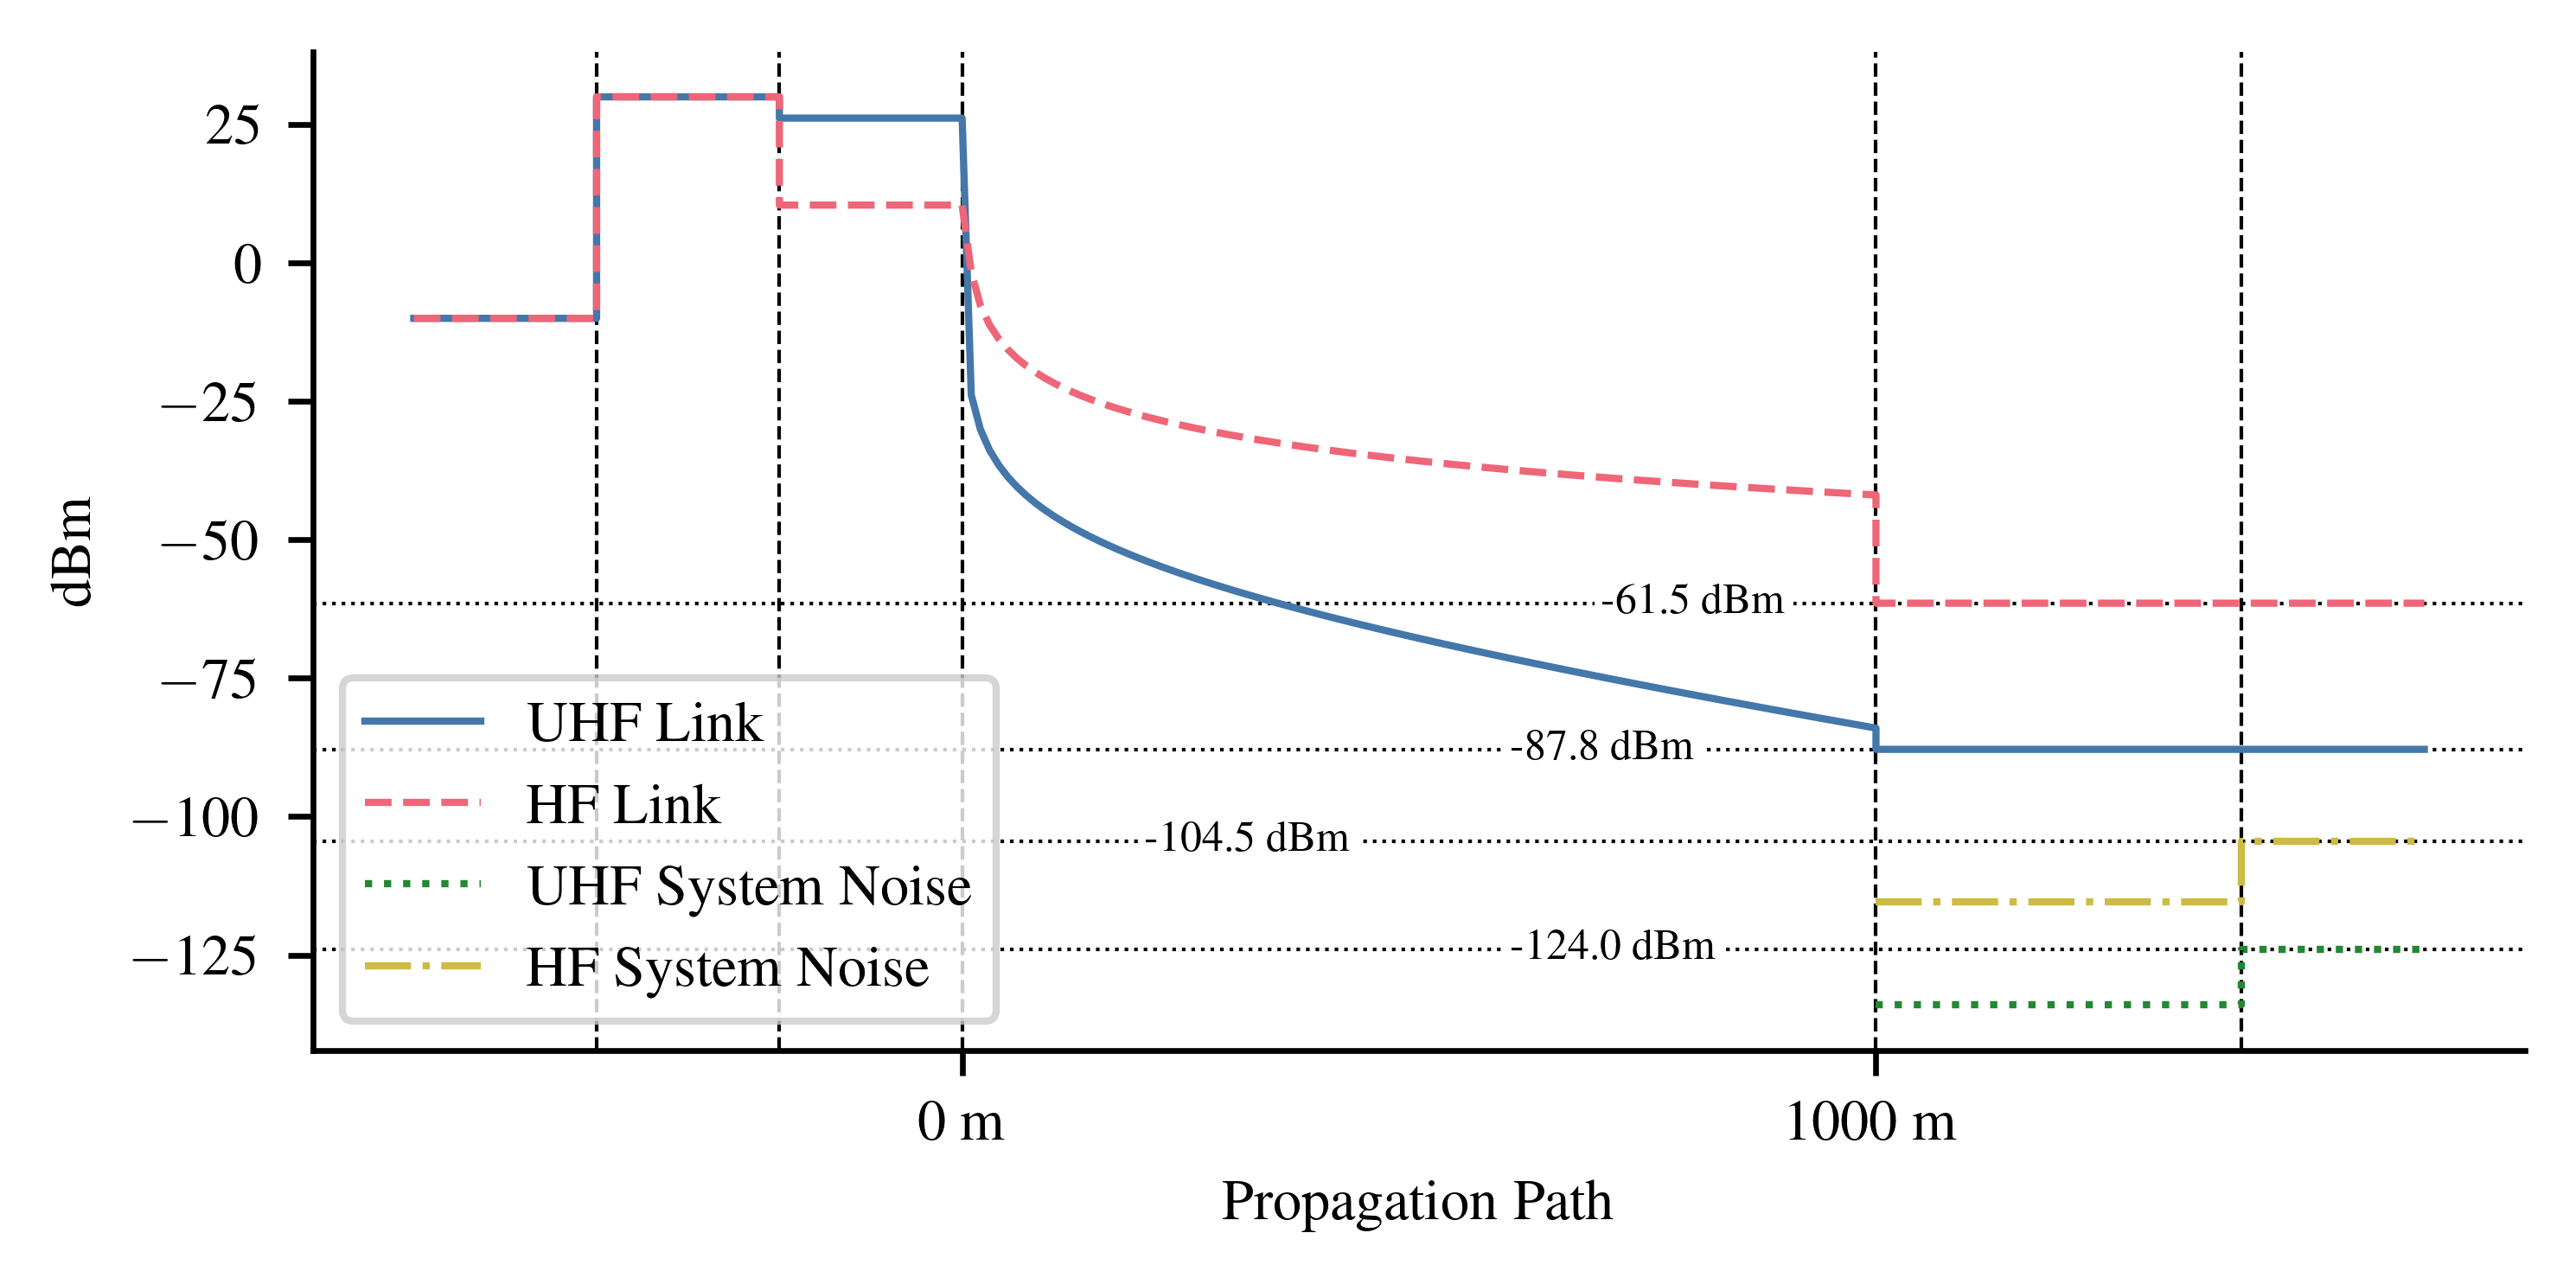

In [78]:
plt.figure()

uhf_EIRP = \
    uhf.transmit_power \
    + 10 * np.log10(uhf_antenna.match_efficiency) \
    + 10 * np.log10(uhf_antenna.radiation_efficiency(273)) \
    + uhf_antenna.directivity(273)

uhf_received_power = \
    uhf.transmit_power \
    + 2 * 10 * np.log10(uhf_antenna.match_efficiency) \
    + 2 * 10 * np.log10(uhf_antenna.radiation_efficiency(273)) \
    + 2 * uhf_antenna.directivity(273) \
    + link_df['UHF Total Loss (dB)'].min()

hf_EIRP = \
    hf.transmit_power \
    + 10 * np.log10(hf_antenna.match_efficiency) \
    + 10 * np.log10(hf_antenna.radiation_efficiency) \
    + hf_antenna.directivity

hf_received_power = \
    hf.transmit_power \
    + 2 * 10 * np.log10(hf_antenna.match_efficiency) \
    + 2 * 10 * np.log10(hf_antenna.radiation_efficiency) \
    + 2 * hf_antenna.directivity \
    + link_df['HF Total Loss (dB)'].min()

uhf_noise_eff_meta_var = uhf_antenna.radiation_efficiency(273) * uhf_antenna.match_efficiency
uhf_noise_power = \
    10 * np.log10(
        (290 * (1 - uhf_noise_eff_meta_var) + uhf.antenna_noise_temperature * uhf_noise_eff_meta_var) \
        * k * uhf.receiver_bw) \
    + uhf.hackrf_noise_figure + 30
uhf_antenna_terminal_power = uhf_noise_power - uhf.hackrf_noise_figure

hf_noise_eff_meta_var = hf_antenna.radiation_efficiency * hf_antenna.match_efficiency
hf_noise_power = \
    10 * np.log10(
        (290 * (1 - hf_noise_eff_meta_var) + hf.antenna_noise_temperature * hf_noise_eff_meta_var) \
        * k * hf.receiver_bw) \
    + hf.hackrf_noise_figure + 30
hf_antenna_terminal_power = hf_noise_power - hf.hackrf_noise_figure

# Vertical line
plt.axvline(x=-400, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=-200, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=1000, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=1400, color='black', linestyle='--', linewidth=0.5)

plt.axhline(y=hf_received_power, color='black', linestyle=':', linewidth=0.5)
plt.text(
    700, 
    hf_received_power, 
    '{0:.1f} dBm'.format(hf_received_power), 
    color='black', va='center', fontsize=6,
    bbox=dict(facecolor='white', edgecolor='none', pad=1))

plt.axhline(y=hf_noise_power, color='black', linestyle=':', linewidth=0.5)
plt.text(
    600, 
    hf_noise_power, 
    '{0:.1f} dBm'.format(hf_noise_power), 
    color='black', va='center', fontsize=6,
    bbox=dict(facecolor='white', edgecolor='none', pad=1))

plt.axhline(y=uhf_received_power, color='black', linestyle=':', linewidth=0.5)
plt.text(
    600, 
    uhf_received_power, 
    '{0:.1f} dBm'.format(uhf_received_power), 
    color='black', va='center', fontsize=6,
    bbox=dict(facecolor='white', edgecolor='none', pad=1))

plt.axhline(y=uhf_noise_power, color='black', linestyle=':', linewidth=0.5)
plt.text(
    600, 
    uhf_noise_power, 
    '{0:.1f} dBm'.format(uhf_noise_power), 
    color='black', va='center', fontsize=6,
    bbox=dict(facecolor='white', edgecolor='none', pad=1))


plt.plot(
    [-600, -400, -400, -200, -200, 0] + list(link_df['Distance']) + [1000, 1600], 
    [-10, -10, uhf.transmit_power, uhf.transmit_power, uhf_EIRP, uhf_EIRP] + list(link_df['UHF Total Loss (dB)'] + uhf_EIRP) + [uhf_received_power, uhf_received_power], 
    label='UHF Link')
plt.plot(
    [-600, -400, -400, -200, -200, 0] + list(link_df['Distance']) + [1000, 1600], 
    [-10, -10, hf.transmit_power, hf.transmit_power, hf_EIRP, hf_EIRP] + list(link_df['HF Total Loss (dB)'] + hf_EIRP) + [hf_received_power, hf_received_power], 
    label='HF Link')

plt.plot(
    [1000, 1400, 1400, 1600], [uhf_antenna_terminal_power,uhf_antenna_terminal_power, uhf_noise_power, uhf_noise_power],
    label='UHF System Noise'
)

plt.plot(
    [1000, 1400, 1400, 1600], [hf_antenna_terminal_power, hf_antenna_terminal_power, hf_noise_power, hf_noise_power],
    label='HF System Noise'
)

# X-axis tick marks
ticks = [0, 1000]
labels = [f"{tick} m" for tick in ticks]
plt.xticks(ticks, labels)

# Other chart details
plt.xlabel('Propagation Path')
plt.ylabel('dBm')
plt.legend(loc='lower left')

ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [76]:
# Calculate SNR
uhf_received_power - uhf_noise_power, hf_received_power - hf_noise_power

(36.12755896389527, 43.0124050921559)